 ## Lecture-03 Gradient Descent and Dymanic Programming

 In this week, we need complete following tasks:
 + Re-review the course online programming;
 + Choose 1 - 2 books which you interested and keep reading;
 + Answer the review questions
 + Prepare the basic requirement of our 1st project.

 ### Part I Review the online programming.

In [1]:
import matplotlib.pyplot as plt
import random
from collections import defaultdict
from functools import wraps

In [2]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 35]
price = defaultdict(int)
for i, p in enumerate(original_price):
    price[i+1] = p

In [3]:
called_time_with_arg = defaultdict(int)


def get_call_time(f):
    @wraps(f)
    def wrap(*args, **kwargs):
        result = f(*args, **kwargs)
        called_time_with_arg[(f.__name__, *args)] += 1
        return result
    return wrap


@get_call_time
def add_ten(n): return n+10


add_ten(10)

20

In [4]:
def memo(f):
    memo.already_computed = {}
    @wraps(f)
    def _wrap(arg):
        result = None

        if arg in memo.already_computed:
            result = memo.already_computed[arg]
        else:
            result = f(arg)
            memo.already_computed[arg] = result
        return result
    return _wrap

@memo
@get_call_time
def r(n):
    max_price, max_split = max([(price[0]+price[n],0)]+[(r(i)+r(n-i), i)
                                                for i in range(1,n)], key=lambda x: x[0])
    solution[n] = (n-max_split, max_split)
    return max_price



In [5]:
solution = [0]*30
r(12)
called_time_with_arg

defaultdict(int,
            {('add_ten', 10): 1,
             ('r', 1): 1,
             ('r', 2): 1,
             ('r', 3): 1,
             ('r', 4): 1,
             ('r', 5): 1,
             ('r', 6): 1,
             ('r', 7): 1,
             ('r', 8): 1,
             ('r', 9): 1,
             ('r', 10): 1,
             ('r', 11): 1,
             ('r', 12): 1})

In [6]:
def parse_solution(solution ,length):
    left,right = solution[length]

    if right==0: return [left]
    return parse_solution(solution ,left)+parse_solution(solution,right)
parse_solution(solution,5)


[3, 2]

 ### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - (\hat{y_i}))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.
 $$ {{\partial L(k,b)} \over {\partial k}} = \sum { 1 \over n } a*x_i $$
 $$ {{\partial L(k,b)} \over {\partial b}} = \sum {1 \over n } a             $$
 `a = 1 if yi > y_hat else -1`

In [7]:
def abs_error(y,y_hat):
    assert len(y)==len(y_hat)
    error = [abs(y[i]-y_hat[i]) for i in range(len(y))]
def abs_gradient(x,y,k,b):
    y_hat = [k*x[i]+b for i in range(len(x))]
    gradient_ks = [x[i] if y[i]-y_hat[i]>0 else -x[i] for i in range(len(x))]
    gradient_bs = [1 if y[i]-y_hat[i]>0 else -1 for i in range(len(x))]
    def mean(gradients):
        return sum(gradients)/len(gradients)
    return mean(gradient_ks),mean(gradient_bs)

 ### Part 3: Finish the Solution Parse Part of Edit-Distance

In [8]:

def lru_cache(f):
    cache = {}
    @wraps(f)
    def wrap(str1,str2):
        if str1+str2 in cache:
            return cache[str1+str2]
        else:
            result = f(str1,str2)
            return result
    return wrap 



In [9]:
@lru_cache
def edit_distance(str1,str2):

    if len(str1)==0:
        return len(str2)
    if len(str2) == 0:
        return len(str1)
    tail_s1 = str1[-1]
    tail_s2 = str2[-1]
    ## distance has three options: delete , add , 
    candidates = [
        (edit_distance(str1[:-1],str2)+1,'DEL {}'.format(tail_s1)),
        (edit_distance(str1,str2[:-1])+1,"ADD {}".format(tail_s2))
    ]
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(str1[:-1],str2[:-1])+0,'SAM SAM')
    else:
        both_forward = (edit_distance(str1[:-1],str2[:-1])+1,'SUB {}=>{}'.format(tail_s1,tail_s2))
    candidates.append(both_forward)

    min_distance,operation = min(candidates,key = lambda x : x[0])

    solution[(str1,str2)] = operation

    return min_distance 
solution = {}
edit_distance('GREET','GREAT')

1

In [10]:
def ed_parse_solution(str1,str2):
    if str1 =='' or str2 =='':
        return []
    ops = solution.get((str1,str2))
    if not ops:
        return []
    operator,*_ = ops.split(" ")
    if operator=="SUB" or operator=='SAM':
        str1 = str1[:-1]
        str2 = str2[:-1]
    elif operator == "ADD":
        str2 = str2[:-1]
    elif operator == "DEL":
        str1 = str1[:-1]
    return [ops]+ed_parse_solution(str1,str2)
ed_parse_solution("GREET","GREAT")



['SAM SAM', 'SUB E=>A', 'SAM SAM', 'SAM SAM', 'SAM SAM']

 ### Part 4 Choose 1 - 2 books to keep reading:
 + SICP, Structure and Interpretation of Computer Programming.
 + Introduction to Algorithms
 + Artificial Intelligence A Modern Approach (3rd Edition)
 + Code Complete 2
 + Programming Pearls
 + Deep Learning
 + 黑客与画家
 + 数学之美
 + Fluent Python
 + Hands on Tensorflow
 + Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

 > most books you may find in our github: https://github.com/Computing-Intelligence/References

 [x] fluent python

 ## Part 5-1: review machine learning

 1. Why do we use Derivative / Gredient to fit a target function?¶

 Ans:导数/梯度决定了一个函数沿着方向轴是上升还是下降。如果我们沿着梯度的反方向前进
 就能找到下一个更低点。从而不断的优化。

 2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

 Ans: 梯度, 是目标函数对某个方向轴的微分.沿着梯度的反方向更新参数,
 可以让目标函数的值下降.因此是梯度下降法


 3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

 Ans:确保了每次迭代都能离最优点/局部最优点 更进一步。从而减少迭代次数， 或者说在相同迭代次数下，找到的点更优

 4. Using the simple words to describe: What's the machine leanring.¶

 Ans: 通过某种方法寻找到一个能够拟合特征与标签之间映射关系的函数。

 ### Part 5: Answer following questions:

 1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problem?

 Ans: 之前的路径搜索问题， 我们只是简单地进行了递归或迭代。在递归中，存在着重复调用相同参数函数的情况，带来了很多的计算量。通过建立一个表，
 让每次调用前先查表，如果有，就直接获取表的内容，而不是调用函数。从而减少了调用次数。这就是动态规划

 2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `riht` answer based on inputs?

 动态规划在求解小规模无不确定性问题时，能够得到全局最优解。 在时间复杂度以及解的质量上要比机器学习好

 3. Can you catch up at least 3 problems which could solved by Dynamic Programming?

 1. 背包问题  2. 斐波那契数列阶梯问题 3 .字符串匹配KMP

 4. Can you catch up at least 3 problems which could sloved by Edit Distance?

 1. 拼写检查
 2. DNA 配对
 3. 命名实体抽取

 5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature.
 [markdown]
 1. 搜索范围非常大；针对某个解，需要搜索较大的空间
 2. 存在着重复搜索； 某些解会被重复搜索到，从而可以采用查表的方式优化查询

 6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

 1. 没有统一标准的求解模型
 2. 存在着维数灾难问题。当某个问题有m个状态，每个状态有n种方法时，那么需要存储$n^m$ 个数据，在m较大时，这是不现实的

 ## Part 6 Preparation of Project-01

 1. Using python Flask or Bottle to finish your first simple web app:
 > https://bottlepy.org/

 2. Learn what's the SQL, and try some simple SQL operations:
 > https://www.w3schools.com/sql/sql_intro.asp

 3. Learn what's the HTML ( *ONLY* need to know the basic things)
 > https://getbootstrap.com/; https://www.w3schools.com/html/

 ### (Optinal) Finish the k-person-salesman problem:

In [11]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]



/home/chihao/miniconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/chihao/miniconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/chihao/miniconda3/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/chihao/miniconda3/lib/python3.7/site-packages/matplotlib/textpath.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  glyph = font.load_char(ccode, flags=LOAD_NO_HINTING)


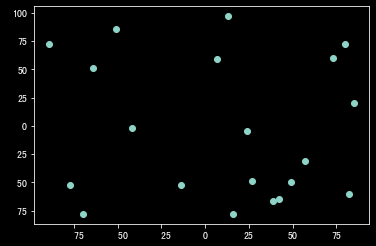

In [12]:
plt.scatter(latitudes, longitude)


 给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

 例如：

In [13]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)



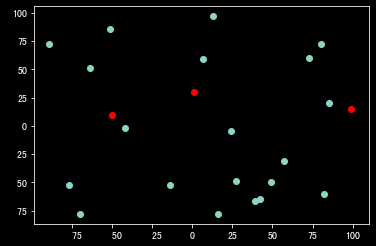

In [14]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')


 shuro